##Acceder a la localizacion del archivo, abriendolo con spark

In [0]:
file_location = "/FileStore/tables/bitstampUSD_1_min_data_2012_01_01_to_2021_03_31.csv"
df = spark.read.csv(file_location, header=True, inferSchema=True)

## Imprimir esquema y mostrar datos

In [0]:
df.printSchema()

root
 |-- Timestamp: integer (nullable = true)
 |-- Open: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- Volume_(BTC): double (nullable = true)
 |-- Volume_(Currency): double (nullable = true)
 |-- Weighted_Price: double (nullable = true)



In [0]:
df.show()

+----------+----+----+----+-----+------------+-----------------+--------------+
| Timestamp|Open|High| Low|Close|Volume_(BTC)|Volume_(Currency)|Weighted_Price|
+----------+----+----+----+-----+------------+-----------------+--------------+
|1325317920|4.39|4.39|4.39| 4.39|  0.45558087|     2.0000000193|          4.39|
|1325317980| NaN| NaN| NaN|  NaN|         NaN|              NaN|           NaN|
|1325318040| NaN| NaN| NaN|  NaN|         NaN|              NaN|           NaN|
|1325318100| NaN| NaN| NaN|  NaN|         NaN|              NaN|           NaN|
|1325318160| NaN| NaN| NaN|  NaN|         NaN|              NaN|           NaN|
|1325318220| NaN| NaN| NaN|  NaN|         NaN|              NaN|           NaN|
|1325318280| NaN| NaN| NaN|  NaN|         NaN|              NaN|           NaN|
|1325318340| NaN| NaN| NaN|  NaN|         NaN|              NaN|           NaN|
|1325318400| NaN| NaN| NaN|  NaN|         NaN|              NaN|           NaN|
|1325318460| NaN| NaN| NaN|  NaN|       

## Realizar la limpieza de datos con na.drop any y asignarlo a dfAny

In [0]:
dfAny= df.na.drop(how='any')

In [0]:
dfAny.show(500)

+----------+----+----+----+-----+------------+-----------------+--------------+
| Timestamp|Open|High| Low|Close|Volume_(BTC)|Volume_(Currency)|Weighted_Price|
+----------+----+----+----+-----+------------+-----------------+--------------+
|1325317920|4.39|4.39|4.39| 4.39|  0.45558087|     2.0000000193|          4.39|
|1325346600|4.39|4.39|4.39| 4.39|        48.0|           210.72|          4.39|
|1325350740| 4.5|4.57| 4.5| 4.57| 37.86229723|     171.38033753|  4.5264114983|
|1325350800|4.58|4.58|4.58| 4.58|         9.0|            41.22|          4.58|
|1325391360|4.58|4.58|4.58| 4.58|       1.502|          6.87916|          4.58|
|1325431680|4.84|4.84|4.84| 4.84|        10.0|             48.4|          4.84|
|1325457900| 5.0| 5.0| 5.0|  5.0|        10.1|             50.5|           5.0|
|1325534640| 5.0| 5.0| 5.0|  5.0|      19.048|            95.24|           5.0|
|1325591100|5.32|5.32|5.32| 5.32|  2.41917293|     12.869999988|          5.32|
|1325600520|5.14|5.14|5.14| 5.14|       

## Importar librerias para graficar si el csv es lineal

In [0]:
import matplotlib.pyplot as plt


In [0]:
p1=dfAny.toPandas()

In [0]:
X = p1['Open']
Y= p1["Close"]

In [0]:
df.printSchema()

root
 |-- Timestamp: integer (nullable = true)
 |-- Open: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- Volume_(BTC): double (nullable = true)
 |-- Volume_(Currency): double (nullable = true)
 |-- Weighted_Price: double (nullable = true)



Out[11]: <matplotlib.collections.PathCollection at 0x7f79eeda6ca0>

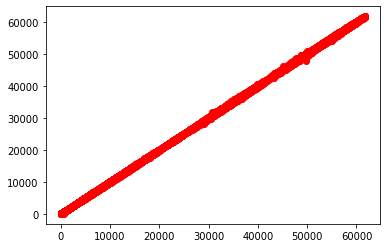

In [0]:
plt.scatter(X,Y, color="red")

## Importar librerias de spark.ml.feature

In [0]:
from pyspark.ml.feature import VectorAssembler
feature_assembler = VectorAssembler(inputCols=["Open","Close","Volume_(BTC)","Volume_(Currency)"], outputCol = "feature_vector")

In [0]:
output = feature_assembler.transform(dfAny)

In [0]:
output.show()

+----------+----+----+----+-----+------------+-----------------+--------------+--------------------+
| Timestamp|Open|High| Low|Close|Volume_(BTC)|Volume_(Currency)|Weighted_Price|      feature_vector|
+----------+----+----+----+-----+------------+-----------------+--------------+--------------------+
|1325317920|4.39|4.39|4.39| 4.39|  0.45558087|     2.0000000193|          4.39|[4.39,4.39,0.4555...|
|1325346600|4.39|4.39|4.39| 4.39|        48.0|           210.72|          4.39|[4.39,4.39,48.0,2...|
|1325350740| 4.5|4.57| 4.5| 4.57| 37.86229723|     171.38033753|  4.5264114983|[4.5,4.57,37.8622...|
|1325350800|4.58|4.58|4.58| 4.58|         9.0|            41.22|          4.58|[4.58,4.58,9.0,41...|
|1325391360|4.58|4.58|4.58| 4.58|       1.502|          6.87916|          4.58|[4.58,4.58,1.502,...|
|1325431680|4.84|4.84|4.84| 4.84|        10.0|             48.4|          4.84|[4.84,4.84,10.0,4...|
|1325457900| 5.0| 5.0| 5.0|  5.0|        10.1|             50.5|           5.0| [5.0,5.0,10

In [0]:
output.columns

Out[15]: ['Timestamp',
 'Open',
 'High',
 'Low',
 'Close',
 'Volume_(BTC)',
 'Volume_(Currency)',
 'Weighted_Price',
 'feature_vector']

## crear el dataset  con feature_vector y weighted_price y mostrarlo

In [0]:
dataset = output.select("feature_vector","Weighted_Price")

In [0]:
dataset.show()

+--------------------+--------------+
|      feature_vector|Weighted_Price|
+--------------------+--------------+
|[4.39,4.39,0.4555...|          4.39|
|[4.39,4.39,48.0,2...|          4.39|
|[4.5,4.57,37.8622...|  4.5264114983|
|[4.58,4.58,9.0,41...|          4.58|
|[4.58,4.58,1.502,...|          4.58|
|[4.84,4.84,10.0,4...|          4.84|
| [5.0,5.0,10.1,50.5]|           5.0|
|[5.0,5.0,19.048,9...|           5.0|
|[5.32,5.32,2.4191...|          5.32|
|[5.14,5.14,0.68,3...|          5.14|
|[5.26,5.26,29.319...|          5.26|
|[5.29,5.29,29.302...|          5.29|
|[5.29,5.29,11.285...|          5.29|
|[5.14,5.14,0.02,0...|          5.14|
|[5.29,5.29,11.0,5...|          5.29|
|[5.29,5.29,4.0108...|          5.29|
|[4.93,4.93,2.32,1...|          4.93|
|[4.93,4.93,9.68,4...|          4.93|
|[5.19,5.19,2.6416...|          5.19|
|[5.19,5.19,8.7244...|          5.19|
+--------------------+--------------+
only showing top 20 rows



## Importacion de librerias para la regresion lineal

In [0]:
from pyspark.ml.regression import LinearRegression
train_data,test_data = dataset.randomSplit([0.75,0.25])

In [0]:
regressor = LinearRegression(featuresCol="feature_vector",labelCol="Weighted_Price")
regressor = regressor.fit(train_data)

In [0]:
pred_results = regressor.evaluate(test_data)

In [0]:
p3=pred_results.predictions

/databricks/spark/python/pyspark/sql/context.py:134: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [0]:
p3.show(1000)

+--------------------+--------------+------------------+
|      feature_vector|Weighted_Price|        prediction|
+--------------------+--------------+------------------+
|[4.14,4.14,2.2438...|          4.14| 4.287439598600772|
|[4.33,4.33,3.55,1...|          4.33| 4.477573057642269|
|[4.35,4.33,6.5077...|  4.3453663254| 4.486576167926254|
|[4.39,4.39,0.4555...|          4.39| 4.537244259370115|
|[4.4,4.4,0.013636...|           4.4| 4.547197359230516|
|[4.4,4.4,7.59,33....|           4.4| 4.547997905836929|
| [4.4,4.4,10.0,44.0]|           4.4| 4.548252555351278|
|[4.44,4.44,7.3,32...|          4.44|4.5879656759508585|
|[4.45,4.45,6.48,2...|          4.45|4.5978787511989125|
|[4.45,4.45,70.073...|          4.45| 4.604589202085276|
|[4.5,4.4,3.03,13....|   4.403630363| 4.590967453959325|
|[4.5,4.5,0.99,4.455]|           4.5|  4.64729834730703|
|[4.5,4.5,2.327888...|           4.5| 4.647439333897489|
| [4.5,4.5,3.9,17.55]|           4.5|4.6476050029796285|
|[4.5,4.57,37.8622...|  4.52641

In [0]:
pred_results.meanAbsoluteError,pred_results.meanSquaredError

Out[22]: (2.0483224613238833, 32.52673942595612)

## Acceder a la archivo de credenciales de aws

In [0]:
display(dbutils.fs.ls("/FileStore/tables"))

path,name,size,modificationTime
dbfs:/FileStore/tables/bitstampUSD_1_min_data_2012_01_01_to_2021_03_31.csv,bitstampUSD_1_min_data_2012_01_01_to_2021_03_31.csv,317526599,1653590484000
dbfs:/FileStore/tables/new_user_credentials.csv,new_user_credentials.csv,202,1653757174000
dbfs:/FileStore/tables/test_ML.csv,test_ML.csv,133,1652988557000


## Importar librerias necesarias para acceder aws

In [0]:
from pyspark.sql.functions import *

import urllib

## Cargar csv de credenciales

In [0]:
file_type = "csv"

firsnt_row_is_header = "true"

delimiter = ","

aws_key_df = spark.read.format(file_type)\
.option("header",firsnt_row_is_header)\
.option("sep",delimiter)\
.load("/FileStore/tables/new_user_credentials.csv")


## Obtner la acces key y secret key, con la columna del nombre del usuario seleccionar el dato correspondiente.

In [0]:
ACCESS_KEY = aws_key_df.where(col('User name')=='databricks-raul').select('Access key ID').collect()[0]['Access key ID']

SECRET_KEY = aws_key_df.where(col('User name')=='databricks-raul').select('Secret access key').collect()[0]['Secret access key']


ENCODED_SECRET_KEY = urllib.parse.quote(string=SECRET_KEY,safe="")

## Crear el nombre del bucket y montarlo a s3 con los datos correspondientes

In [0]:
aws_bucket_name = "s3-bucket-databricks-rizo"
mount_name = "prueba_1"
dbutils.fs.mount("s3a://%s:%s@%s" % (ACCESS_KEY, ENCODED_SECRET_KEY, aws_bucket_name), "/mnt/%s" % mount_name)
display(dbutils.fs.ls("/mnt/%s" % mount_name))


---------------------------------------------------------------------------
ExecutionError                            Traceback (most recent call last)
<command-304018419004672> in <module>
      1 aws_bucket_name = "s3-bucket-databricks-rizo"
      2 mount_name = "prueba_1"
----> 3 dbutils.fs.mount("s3a://%s:%s@%s" % (ACCESS_KEY, ENCODED_SECRET_KEY, aws_bucket_name), "/mnt/%s" % mount_name)
      4 display(dbutils.fs.ls("/mnt/%s" % mount_name))

/databricks/python_shell/dbruntime/dbutils.py in f_with_exception_handling(*args, **kwargs)
    387                     exc.__context__ = None
    388                     exc.__cause__ = None
--> 389                     raise exc
    390 
    391             return f_with_exception_handling

ExecutionError: An error occurred while calling o344.mount.
: java.rmi.RemoteException: java.lang.IllegalArgumentException: requirement failed: Directory already mounted: /mnt/prueba_1; nested exception is: 
	java.lang.IllegalArgumentException: requirement

## Mostrar los montajes

In [0]:
display(dbutils.fs.ls("/mnt/"))

path,name,size,modificationTime
dbfs:/mnt/prueba1/,prueba1/,0,0
dbfs:/mnt/prueba_1/,prueba_1/,0,0
dbfs:/mnt/s3-bucket-databricks-rasd/,s3-bucket-databricks-rasd/,0,0


In [0]:
display(dbutils.fs.ls("dbfs:/mnt/"))

path,name,size,modificationTime
dbfs:/mnt/prueba1/,prueba1/,0,0
dbfs:/mnt/prueba_1/,prueba_1/,0,0
dbfs:/mnt/s3-bucket-databricks-rasd/,s3-bucket-databricks-rasd/,0,0


## Mandar al s3 el archivo con formato parquet

In [0]:
p3.write.save(f'dbfs:/mnt/prueba1/ayuda',format='parquet')

In [0]:
p3.show(100000)

+--------------------+--------------+------------------+
|      feature_vector|Weighted_Price|        prediction|
+--------------------+--------------+------------------+
|[4.14,4.14,2.2438...|          4.14| 4.287439598600772|
|[4.33,4.33,3.55,1...|          4.33| 4.477573057642269|
|[4.35,4.33,6.5077...|  4.3453663254| 4.486576167926254|
|[4.39,4.39,0.4555...|          4.39| 4.537244259370115|
|[4.4,4.4,0.013636...|           4.4| 4.547197359230516|
|[4.4,4.4,7.59,33....|           4.4| 4.547997905836929|
| [4.4,4.4,10.0,44.0]|           4.4| 4.548252555351278|
|[4.44,4.44,7.3,32...|          4.44|4.5879656759508585|
|[4.45,4.45,6.48,2...|          4.45|4.5978787511989125|
|[4.45,4.45,70.073...|          4.45| 4.604589202085276|
|[4.5,4.4,3.03,13....|   4.403630363| 4.590967453959325|
|[4.5,4.5,0.99,4.455]|           4.5|  4.64729834730703|
|[4.5,4.5,2.327888...|           4.5| 4.647439333897489|
| [4.5,4.5,3.9,17.55]|           4.5|4.6476050029796285|
|[4.5,4.57,37.8622...|  4.52641

In [0]:
display(dbutils.fs.ls("/mnt/prueba1/ayuda/"))

path,name,size,modificationTime
dbfs:/mnt/prueba1/ayuda/_SUCCESS,_SUCCESS,0,1653779313000
dbfs:/mnt/prueba1/ayuda/_committed_8437169336146940043,_committed_8437169336146940043,824,1653779312000
dbfs:/mnt/prueba1/ayuda/_started_8437169336146940043,_started_8437169336146940043,0,1653779272000
dbfs:/mnt/prueba1/ayuda/part-00000-tid-8437169336146940043-253ba043-ddaf-48c9-9a73-68e9d8f3e44d-208-1-c000.snappy.parquet,part-00000-tid-8437169336146940043-253ba043-ddaf-48c9-9a73-68e9d8f3e44d-208-1-c000.snappy.parquet,1927233,1653779305000
dbfs:/mnt/prueba1/ayuda/part-00001-tid-8437169336146940043-253ba043-ddaf-48c9-9a73-68e9d8f3e44d-209-1-c000.snappy.parquet,part-00001-tid-8437169336146940043-253ba043-ddaf-48c9-9a73-68e9d8f3e44d-209-1-c000.snappy.parquet,4990045,1653779312000
dbfs:/mnt/prueba1/ayuda/part-00002-tid-8437169336146940043-253ba043-ddaf-48c9-9a73-68e9d8f3e44d-210-1-c000.snappy.parquet,part-00002-tid-8437169336146940043-253ba043-ddaf-48c9-9a73-68e9d8f3e44d-210-1-c000.snappy.parquet,4408904,1653779312000
dbfs:/mnt/prueba1/ayuda/part-00003-tid-8437169336146940043-253ba043-ddaf-48c9-9a73-68e9d8f3e44d-211-1-c000.snappy.parquet,part-00003-tid-8437169336146940043-253ba043-ddaf-48c9-9a73-68e9d8f3e44d-211-1-c000.snappy.parquet,4594768,1653779311000
dbfs:/mnt/prueba1/ayuda/part-00004-tid-8437169336146940043-253ba043-ddaf-48c9-9a73-68e9d8f3e44d-212-1-c000.snappy.parquet,part-00004-tid-8437169336146940043-253ba043-ddaf-48c9-9a73-68e9d8f3e44d-212-1-c000.snappy.parquet,5323858,1653779310000
dbfs:/mnt/prueba1/ayuda/part-00005-tid-8437169336146940043-253ba043-ddaf-48c9-9a73-68e9d8f3e44d-213-1-c000.snappy.parquet,part-00005-tid-8437169336146940043-253ba043-ddaf-48c9-9a73-68e9d8f3e44d-213-1-c000.snappy.parquet,5167566,1653779311000
dbfs:/mnt/prueba1/ayuda/part-00006-tid-8437169336146940043-253ba043-ddaf-48c9-9a73-68e9d8f3e44d-214-1-c000.snappy.parquet,part-00006-tid-8437169336146940043-253ba043-ddaf-48c9-9a73-68e9d8f3e44d-214-1-c000.snappy.parquet,5333563,1653779309000


##Leer desde el s3

In [0]:
df1 = spark.read.parquet("/mnt/prueba1/ayuda/")

In [0]:
df1.show()

+--------------------+--------------+------------------+
|      feature_vector|Weighted_Price|        prediction|
+--------------------+--------------+------------------+
|[3858.27,3889.97,...|   3875.980373|3875.4673002019645|
|[3923.42,3934.96,...|  3938.8272141| 3928.988273777878|
|[3934.98,4018.84,...|  3998.3630962| 3981.692174413456|
|[4048.59,4084.62,...|   4068.584777|4068.8584819960133|
|[4129.09,4197.52,...|  4148.3038134| 4167.204401335765|
|[4194.95,4316.12,...|  4269.5645307| 4262.173290559153|
|[4230.0,4172.0,74...|  4224.3407563| 4196.391616735998|
|[4461.34,4493.98,...|   4460.953059| 4478.904206816923|
|[4498.46,4475.89,...|  4478.5785433| 4485.390730643366|
|[4502.06,4514.16,...|    4481.17438| 4508.251922360989|
|[4507.96,4519.01,...|  4513.0834889| 4513.620351074968|
|[4510.0,4485.37,2...|  4488.2125518| 4495.777076494809|
|[4520.09,4522.47,...|  4517.2394395|4521.4240384529485|
|[4522.9,4511.54,2...|  4513.1902121| 4516.212108228341|
|[4525.95,4553.85,...|  4533.48